In [52]:
from projection_utils import *
import pickle
import matplotlib.pyplot as plt
import open3d_vis_utils as V
import cv2
import torch

In [53]:
img = plt.imread("./data/image/0038.png")
pcd = np.load("./data/pcd/0038.npy")
with open("./data/pred_dict_3D/0038_pred_dict.pickle", 'rb') as handle:
    pred_dict_3D = pickle.load(handle)
    boxes_3D = pred_dict_3D["pred_boxes"]
    scores_3D = pred_dict_3D["pred_scores"]
    labels_3D = pred_dict_3D["pred_labels"]
with open("./data/pred_dict_2D/0038_pred_dict_2D.pickle", 'rb') as handle:
    pred_dict_2D = pickle.load(handle)
    boxes_2D = pred_dict_2D["boxes"]
    scores_2D = pred_dict_2D["scores"]
    classes_2D = pred_dict_2D["classes"]

In [54]:
boxes_2D

array([[ 601.7733 ,  499.3728 ,  672.74225,  535.5947 ],
       [ 249.68852,  494.4106 ,  298.2574 ,  526.0343 ],
       [ 904.0054 ,  472.43103, 1078.1804 ,  561.80304]], dtype=float32)

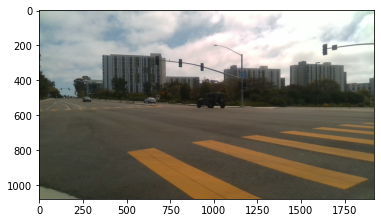

In [55]:
plt.imshow(img)
# plt.plot(940.09527588, 507.89971924, "og", markersize=10)

In [56]:
boxes_3D[4:5]
boxes_3D[:6]

tensor([[ 12.0305,  12.3317,  -0.2406,   4.2214,   1.6851,   1.5094,   2.6132],
        [ 40.7842,  -8.5878,   0.4647,   3.8367,   1.6026,   1.4607,   2.6140],
        [ 28.8681,   2.7534,   0.5071,   4.0162,   1.6076,   1.5282,   1.6533],
        [ 46.2989,   6.2338,   0.8187,   4.2639,   1.6388,   1.5250,   1.6065],
        [ 31.3598,  -0.1179,   0.5201,   3.9506,   1.6822,   1.5831,   2.8671],
        [ 26.3526, -27.1608,   0.2741,   4.1263,   1.6747,   1.6123,   5.7913]])

In [57]:
# V.draw_scenes(pcd, ref_boxes=boxes_3D[4:5])

In [58]:
box_1 = boxes_3D[4:5]
lidar2CameraOurs(box_1[:, [1, 2, 0]])

array([[940.09527588, 507.89971924]])

In [70]:
with open("./outputs/0038_pred_dict_filtered.pickle", 'rb') as handle:
    pred_dict_3D = pickle.load(handle)
    boxes_3D = pred_dict_3D["pred_boxes"]
    scores_3D = pred_dict_3D["pred_scores"]
    labels_3D = pred_dict_3D["pred_labels"]

print(boxes_3D)

[tensor([12.0305, 12.3317, -0.2406,  4.2214,  1.6851,  1.5094,  2.6132]), tensor([40.7842, -8.5878,  0.4647,  3.8367,  1.6026,  1.4607,  2.6140]), tensor([28.8681,  2.7534,  0.5071,  4.0162,  1.6076,  1.5282,  1.6533]), tensor([31.3598, -0.1179,  0.5201,  3.9506,  1.6822,  1.5831,  2.8671])]


In [71]:
# V.draw_scenes(pcd, ref_boxes=boxes_3D)
a = boxes_3D[0]
a = a[None,:]
a

tensor([[12.0305, 12.3317, -0.2406,  4.2214,  1.6851,  1.5094,  2.6132]])

In [72]:
a = boxes_3D[0][None,:]
for i in range(1, len(boxes_3D)):
    b = boxes_3D[i][None,:]
    a = torch.cat([a,b], dim=0)
a
boxes = a

In [73]:
V.draw_scenes(pcd, ref_boxes=boxes)